In [78]:
# import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json

from nltk.stem import PorterStemmer
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords

from wordcloud import WordCloud

In [54]:
# load the data

data = pd.read_csv("ramen-ratings.csv")

In [9]:
# check the dataset dimensions

data.shape

(2580, 7)

In [5]:
# check the first 5 rows

data.head()

Review #           Brand  \
0      2580       New Touch   
1      2579        Just Way   
2      2578          Nissin   
3      2577         Wei Lih   
4      2576  Ching's Secret   

                                             Variety Style Country Stars  \
0                          T's Restaurant Tantanmen    Cup   Japan  3.75   
1  Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...  Pack  Taiwan     1   
2                      Cup Noodles Chicken Vegetable   Cup     USA  2.25   
3                      GGE Ramen Snack Tomato Flavor  Pack  Taiwan  2.75   
4                                    Singapore Curry  Pack   India  3.75   

  Top Ten  
0     NaN  
1     NaN  
2     NaN  
3     NaN  
4     NaN

In [25]:
# check the data types of each column of data

data.dtypes

Review #     int64
Brand       object
Variety     object
Style       object
Country     object
Stars       object
Top Ten     object
dtype: object

In [48]:
# check the unique values of column "Stars"
# it seems there is a string value "Unrated"

data["Stars"].unique()

array(['3.75', '1', '2.25', '2.75', '4.75', '4', '0.25', '2.5', '5',
       '4.25', '4.5', '3.5', 'Unrated', '1.5', '3.25', '2', '0', '3',
       '0.5', '4.00', '5.0', '3.50', '3.8', '4.3', '2.3', '5.00', '3.3',
       '4.0', '3.00', '1.75', '3.0', '4.50', '0.75', '1.25', '1.1', '2.1',
       '0.9', '3.1', '4.125', '3.125', '2.125', '2.9', '0.1', '2.8',
       '3.7', '3.4', '3.6', '2.85', '3.2', '3.65', '1.8'], dtype=object)

In [55]:
# I will replace "Unrated" value to an arbitrary value as it hinders me from changing column "Stars" from str to float

data["Stars"] = np.where(data["Stars"] == "Unrated", 6, data["Stars"])

In [56]:
# convert column "Stars" from str to float

data["Stars"] = data["Stars"].apply(float)

## Exploratory Data Analysis

In [8]:
# check how many different brands are out there

print("The number of ramen brands are: {}".format(data["Brand"].nunique()))

The number of ramen brands are: 355


In [10]:
# check what are different styles of ramen

print("The styles of ramen are: {}".format(data["Style"].unique()))

The styles of ramen are: ['Cup' 'Pack' 'Tray' 'Bowl' 'Box' 'Can' 'Bar' nan]


In [11]:
# check the number of different countries having ramen 

print("The number of countries are: {}".format(data["Country"].nunique()))

The number of countries are: 38


C:\Users\chern\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Style', ylabel='count'>

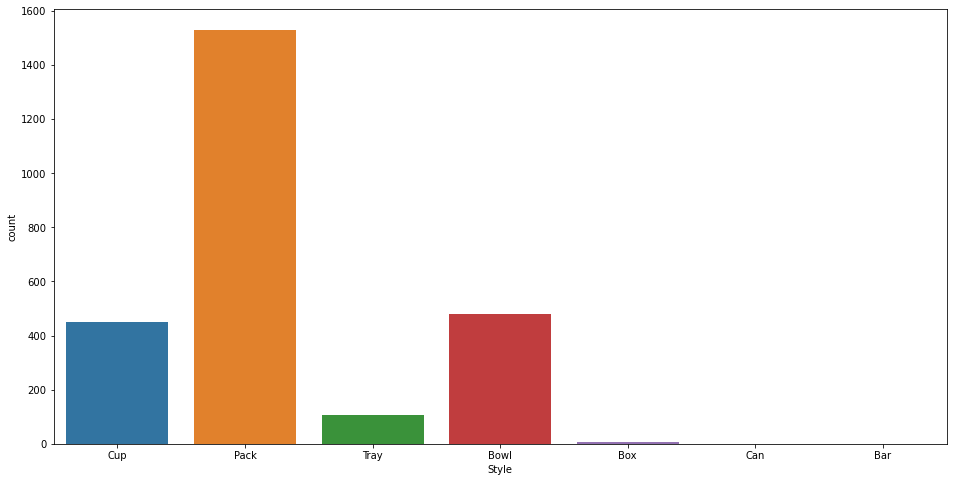

In [12]:
# check the column "Style"
# it seems like most of the shops offering ramen "pack" to their customers

plt.figure(figsize=(16,8))
sns.countplot(data["Style"])

C:\Users\chern\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Country', ylabel='count'>

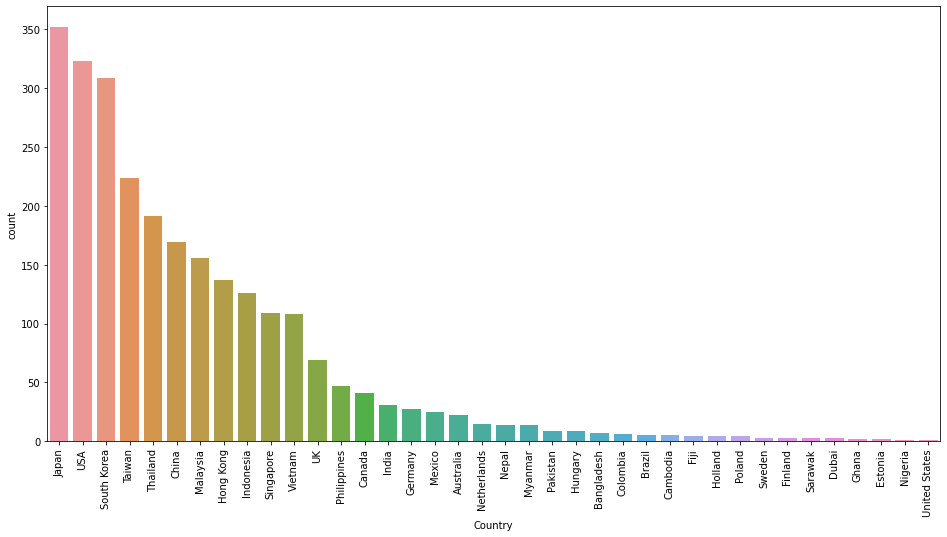

In [16]:
# check which country having the highest number of ramen brand
# it is obvious Japan having the highest number of brand as ramen originated from Japan itself
# USA seems really like to eat ramen as well

plt.figure(figsize=(16,8))
plt.xticks(rotation=90)
sns.countplot(data["Country"], order=data["Country"].value_counts().index)

<AxesSubplot:xlabel='Country', ylabel='Stars'>

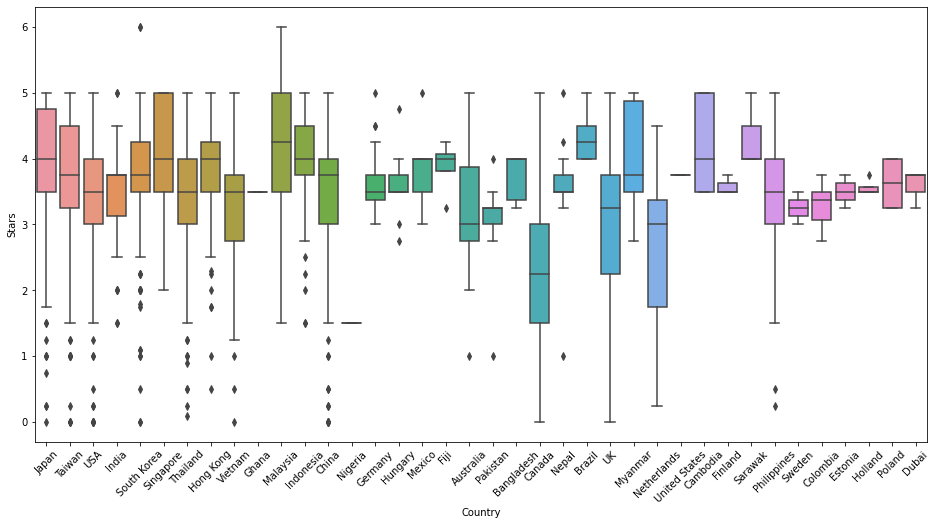

In [59]:
# check the column "Stars"
# it seems like "Malaysia" and "Brazil" have more or less the same medium value
# overall, "Brazil" ramen restaurants may perform better than "Malaysia" as "Brazil" has shorter IQR range. 

plt.figure(figsize=(16,8))
plt.xticks(rotation=45)
sns.boxplot(data=data, y="Stars", x="Country")

In [63]:
# check which country has achieved the most number of "Top Ten"
# it seems like "Singapore" and "South Korea" have achieved the most number of being enlisted into Top Ten

data.groupby("Country").agg({'Top Ten': "count"}).reset_index().rename(columns={"Top Ten":"Number of Top Ten Achieved"}).sort_values("Number of Top Ten Achieved",ascending=False).head()

Country  Number of Top Ten Achieved
29    Singapore                           7
30  South Korea                           7
18        Japan                           6
17    Indonesia                           6
19     Malaysia                           6

In [64]:
# check which brand has achieved the most number of "Top Ten"
# it seems "Prime Taste" and "Indomie" have achieved the most number of "Top Ten"

data.groupby("Brand").agg({'Top Ten': "count"}).reset_index().rename(columns={"Top Ten":"Number of Top Ten Achieved"}).sort_values("Number of Top Ten Achieved",ascending=False).head()

Brand  Number of Top Ten Achieved
225  Prima Taste                           5
110      Indomie                           5
195     Nongshim                           4
208        Paldo                           3
181      MyKuali                           3

In [66]:
# check "Prima Taste" is from which country

set(data[data["Brand"] == "Prima Taste"]["Country"])

{'Singapore'}

In [67]:
# check "Indomie" is from which country

set(data[data["Brand"] == "Indomie"]["Country"])

{'Indonesia', 'Nigeria'}

## NLP

In [73]:
stop_words = stopwords.words("english")
stemmer = PorterStemmer()
tokenizer = RegexpTokenizer(r'\w+')

In [76]:
# try to get a list of words to build word cloud

word_corpus = []

for sentence in data["Variety"]:
    word_list = tokenizer.tokenize(sentence.lower())
    for word in word_list:
        stemmed_word = stemmer.stem(word)
        if stemmed_word not in stop_words:
            word_corpus.append(stemmed_word)

In [79]:
# build a word cloud

wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white',  
                min_font_size = 10).generate(json.dumps(word_corpus)) 

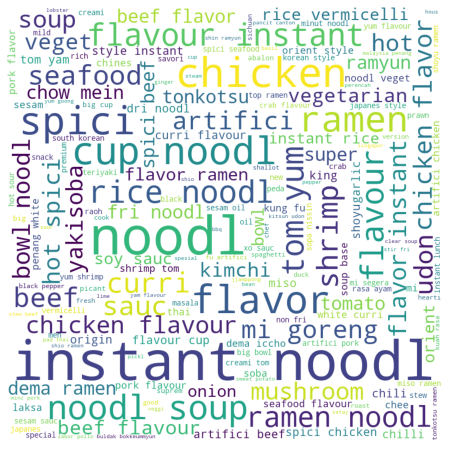

In [80]:
# it seems like "instant" word is quite common
# "chicken" and "seafood" are quite common flavors
# "spicy" is quite common as well
# perhaps a lot of customers prefer to eat spicy ramens

plt.figure(figsize=(16,8))
plt.axis("off")
plt.imshow(wordcloud)